# Imports

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.metrics import RocCurveDisplay

# Best Model History

In [18]:
best_model = pd.read_csv("best_model_history.csv")
best_model.drop(columns="Unnamed: 0", inplace=True)
best_model.tail()

,train_prec,val_prec,train_recall,val_recall,train_auc,val_auc,train_f1,val_f1
0,1,1,1,1,1,1,1,1


In [36]:
def plot_line(best_model, metrics):
    # Configure figure and plots
    fig, ax = plt.subplots(1, 2, figsize=(10,5))

    # Format the metrics into graphing
    titles = []
    data = []
    val_data = []
    for metric in metrics:
        titles.append(f"{metric.title()} History")
        data.append(f"{metric}")
        val_data.append(f"val_{metric}")

    ax[0].set_ylabel("Score")
    # Graphs the data
    for i in range(len(ax)):
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Epoch")
        ax[i].plot(best_model[data[i]], label="train")
        ax[i].plot(best_model[val_data[i]], label="validation")
        ax[i].legend(loc='best')
    
    # Saving files
    name = "_".join(metrics)
    plt.tight_layout()
    plt.savefig(f"../Images/{name}_history.png")
    plt.show()

    # Return
    return

KeyError: 'recall'

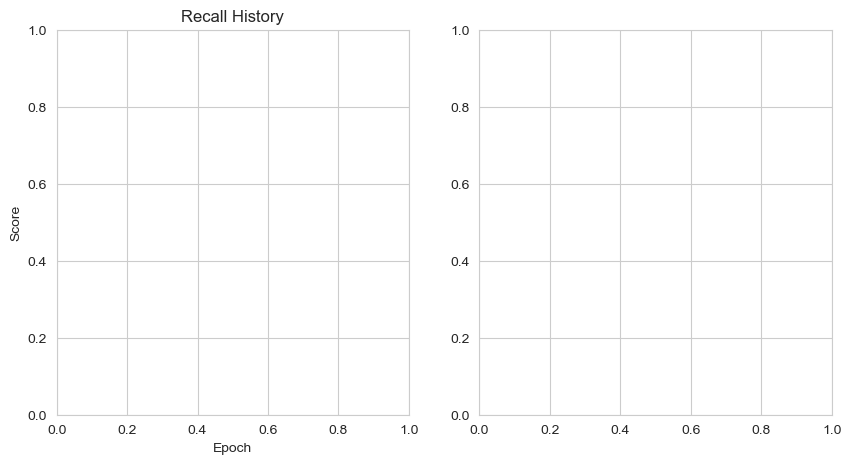

In [37]:
plot_line(best_model, ['recall', 'prec'])

# Three Model Comparison

In [34]:
df = pd.read_csv("model_scores.csv")
df.set_index("Unnamed: 0", inplace=True)
df

,train_prec,val_prec,train_recall,val_recall,train_auc,val_auc,train_f1,val_f1
Unnamed: 0,,,,,,,,
model_a,1,1,1,1,1,1,1,1
model_b,1,1,1,1,1,1,1,1
model_c,1,1,1,1,1,1,1,1


In [32]:
def plot_bar(df, list_of_columns):

    # Configure figure and plots
    total_graphs = len(list_of_columns)
    fig, ax = plt.subplots(1, total_graphs, figsize=(10,5), sharey=True)

    # Create data lists for graphing to loop over
    x_tick_labels = [f"{index[:10]}_" for index in df.index.to_list()]
    width = 0.3

    # Graphs the data
    ax[0].set_ylabel("Scores")
    for i in range(len(ax)):
        x_tick_indexes = np.arange(len(x_tick_labels))
        ax[i].set_title(f"{list_of_columns[i].title()}", size=18)
        ax[i].set_xlabel("Models")
        ax[i].bar(x_tick_indexes, df[f"train_{list_of_columns[i]}"], width, label="train", alpha=0.5)
        ax[i].bar(x_tick_indexes + width, df[f"val_{list_of_columns[i]}"], width, label="validation", alpha=0.5)
        ax[i].set_xticks(x_tick_indexes + width / 2, x_tick_labels)
        ax[i].legend(loc='best')
    
    # Saving
    plt.tight_layout()
    plt.savefig(f"../Images/{list_of_columns[0]}_{list_of_columns[1]}.png")
    plt.show()

    # Return
    return

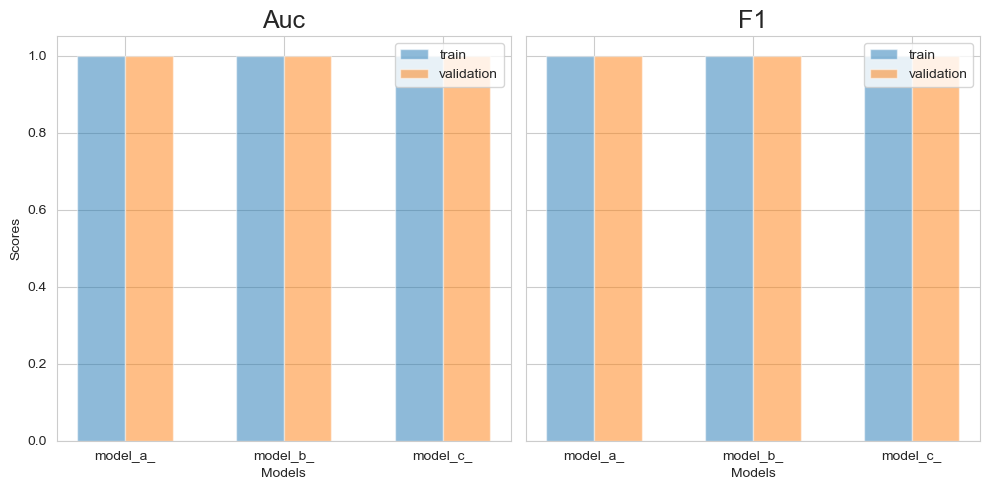

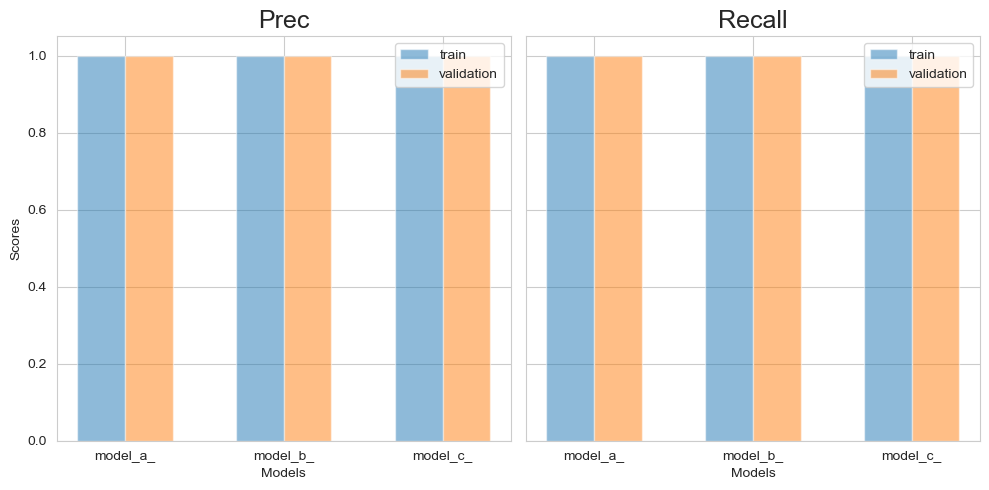

In [35]:
plot_bar(df, ["auc", "f1"])
plot_bar(df, ["prec", "recall"])